<a href="https://colab.research.google.com/github/SSaprativa/Deep_Learning/blob/main/CNNpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

## Data Loading

In [13]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:04<00:00, 38980481.01it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [14]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [15]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

In [16]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)
print(images[1].shape)
print(labels[1].item()) # 1 th image clss 5 'dog'

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
3


## Visualizing Data

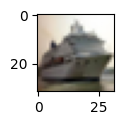

In [55]:
#converting the image into numpy array and then plot it
img = np.transpose(images[0].numpy(), (1, 2, 0))
plt.figure(figsize=(1, 1))
plt.imshow(img)
plt.show()

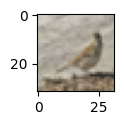

In [56]:
#converting the image into numpy array and then plot it
img = np.transpose(images[1].numpy(), (1, 2, 0))
plt.figure(figsize=(1, 1))
plt.imshow(img)
plt.show()

In [57]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

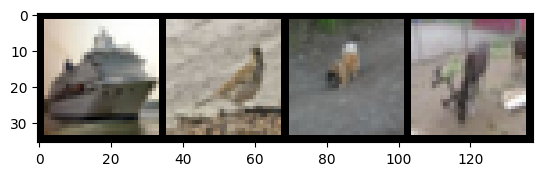

ship bird dog deer


In [58]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional layer

In [59]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
      super(FirstCNN,self).__init__()
      self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=(1,1),stride=(2,2)) # [4, 3, 32, 32] # rgb = 3 16 kernels of size 3

    def forward(self,x):
      x = self.conv1(x)
      return x

In [60]:
net = FirstCNN()

In [61]:
out = net(images)
print(out.shape)

torch.Size([4, 16, 16, 16])


In [62]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


(16, 16)


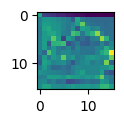

In [63]:
out1 = out[0,0,:,:].detach().numpy()
print(out1.shape)
plt.figure(figsize=(1, 1))
plt.imshow(out1)
plt.show()

## Deep CNN

In [64]:
class firtstCNN2(nn.Module):
  def __init__(self):
    super(firtstCNN2,self).__init__()
    self.model = nn.Sequential(
                  nn.Conv2d(3,8,3), #(4,3,32,32) -> (4,8,30,30)
                  nn.Conv2d(8,16,3)) #(4,8,30,30) ->(4,16,28,28)
  def forward(self,x):
    x = self.model(x)
    return x

In [65]:
net = firtstCNN2()
out = net(images)
print(out.shape)

torch.Size([4, 16, 28, 28])


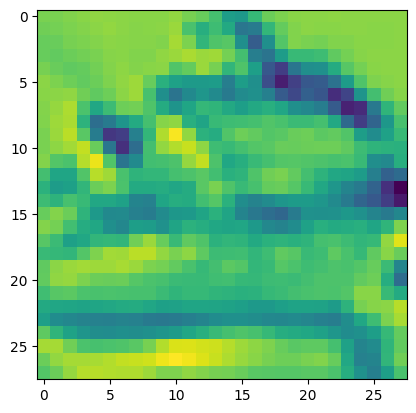

In [66]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

In [67]:
class firstCNN3(nn.Module):
  def __init__(self):
    super(firstCNN3,self).__init__()
    self.model = nn.Sequential(
                  nn.Conv2d(3,6,5),           #(4,3,32,32) -> (4,6,28,28)
                  nn.AvgPool2d(2,stride=2),   #(4,6,28,28) -> (4,6,14,14)
                  nn.Conv2d(6,16,5),          #(4,6,14,14) -> (4,16,10,10)
                  nn.AvgPool2d(2,stride=2))   #(4,16,10,10) -> (4,16,5,5)

  def forward(self,x):
    x = self.model(x)
    return x

In [68]:
net = firstCNN3()
out = net(images)
print(out.shape)

torch.Size([4, 16, 5, 5])


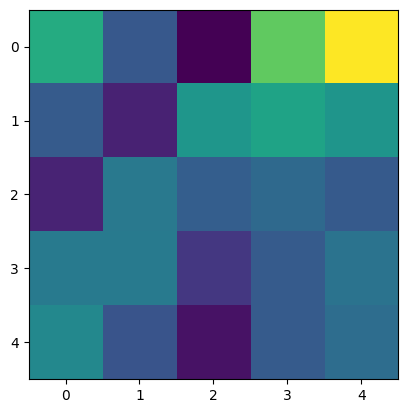

In [69]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

## LeNet Network

In [70]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
                    nn.Conv2d(3,6,5),   ##(N,3,32,32)->(N,6,28,28)
                    nn.Tanh(),
                    nn.AvgPool2d(2,stride=2), ##(N,6,28,28)->(N,6,14,14)
                    nn.Conv2d(6,16,5),         ##(N,6,14,14)->(N,16,10,10)
                    nn.Tanh(),
                    nn.AvgPool2d(2,stride=2)) ##(N,6,10,10)->(N,6,5,5)
    self.fc_model = nn.Sequential(
                    nn.Linear(16*5*5,120), ##(N,400) -> (N,120)
                    nn.Tanh(),
                    nn.Linear(120,84),     ##(N,120) -> (N,84)
                    nn.Tanh(),
                    nn.Linear(84,10))     ##(N,84) -> (N,10)

  def forward(self,x):
    print(x.shape)
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0),-1)
    print(x.shape)
    x = self.fc_model(x)
    return x

In [71]:
net = LeNet()
out = net(images)
print(out.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [72]:
print(out)

tensor([[ 0.1018, -0.0454,  0.0555,  0.0541, -0.0960,  0.1222,  0.1065, -0.0742,
         -0.0375,  0.0034],
        [ 0.1072, -0.0392,  0.0693,  0.0619, -0.1217,  0.1458,  0.1294, -0.0932,
         -0.0531,  0.0115],
        [ 0.1155, -0.0485,  0.0648,  0.0567, -0.1100,  0.1301,  0.1239, -0.0780,
         -0.0534,  0.0179],
        [ 0.1023, -0.0498,  0.0651,  0.0538, -0.1127,  0.1377,  0.1195, -0.0859,
         -0.0505,  0.0091]], grad_fn=<AddmmBackward0>)


In [73]:
max_values,pred_class = torch.max(out.data,1)
print(pred_class)

tensor([5, 5, 5, 5])


## Training LeNet

In [78]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [32]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [80]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [81]:
net = LeNet()

In [82]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.76, Train acc: 38.99
Epoch: 1/16, Test acc: 43.85, Train acc: 44.05
Epoch: 2/16, Test acc: 46.81, Train acc: 47.39
Epoch: 3/16, Test acc: 48.64, Train acc: 49.85
Epoch: 4/16, Test acc: 50.81, Train acc: 52.79
Epoch: 5/16, Test acc: 51.77, Train acc: 54.32
Epoch: 6/16, Test acc: 52.64, Train acc: 55.98
Epoch: 7/16, Test acc: 52.84, Train acc: 57.54
Epoch: 8/16, Test acc: 53.85, Train acc: 58.62
Epoch: 9/16, Test acc: 54.42, Train acc: 60.10
Epoch: 10/16, Test acc: 54.38, Train acc: 60.40
Epoch: 11/16, Test acc: 54.29, Train acc: 60.89
Epoch: 12/16, Test acc: 55.33, Train acc: 63.31
Epoch: 13/16, Test acc: 55.28, Train acc: 64.10
Epoch: 14/16, Test acc: 55.50, Train acc: 64.74
Epoch: 15/16, Test acc: 55.35, Train acc: 65.21


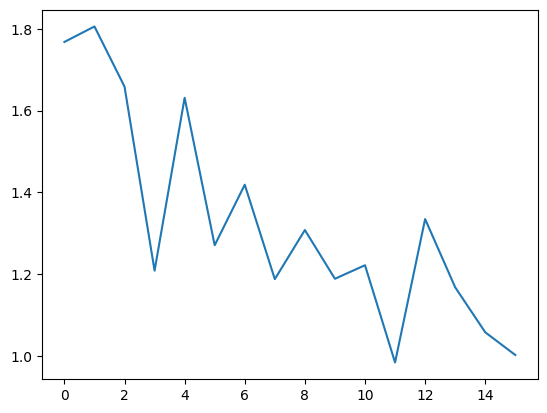

CPU times: user 10min 47s, sys: 1.64 s, total: 10min 49s
Wall time: 10min 56s


In [83]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))


plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [7]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [10]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [17]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 11min 33s, sys: 1min 14s, total: 12min 48s
Wall time: 15min 38s


## Basic Visualization

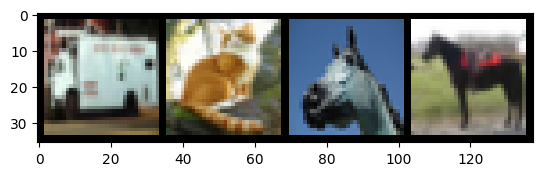

In [20]:
import matplotlib.pyplot as plt
import torchvision

# Assuming 'images' is a PyTorch tensor as per your global variables
grid = torchvision.utils.make_grid(images)

# Convert the tensor to a NumPy array for compatibility with matplotlib
grid_np = grid.permute(1, 2, 0).numpy()

plt.imshow(grid_np)
plt.show()

In [21]:
net = net.to("cpu")

In [22]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [23]:
out = net.cnn_model[0](images)
print(out.shape)

torch.Size([4, 6, 28, 28])


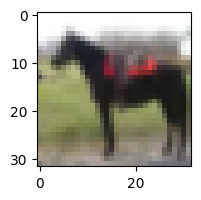

In [27]:
import matplotlib.pyplot as plt
image_id = 3
plt.figure(figsize = (2,2))
plt.imshow(images[image_id,].permute(1, 2, 0)) # Transpose the image for matplotlib
plt.show()

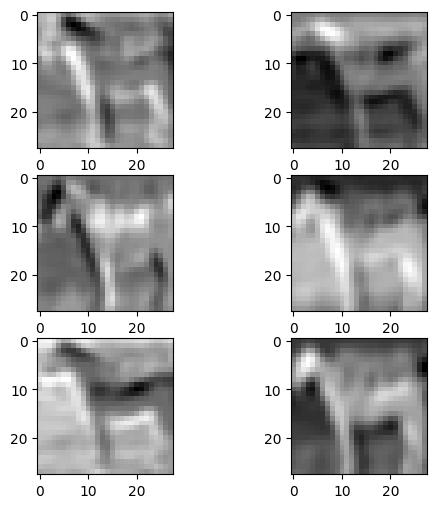

In [28]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()